# Data Question 1

#### 3 & 4) Imports Cell and Magic Command

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline

#### 5) Read GDP Dataset into notebook as gdp_df

In [3]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv", skipfooter = 2, engine = 'python')

#### 5a) View the first 10 rows

In [4]:
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


#### 5b) View the last 5 rows

In [5]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


Originally, the tail showed two footnotes rows. To get rid of them, I used the skipfooter and engine parameters within the read csv step

#### 6a) Drop Value Footnotes column

In [6]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

#### 6b) Rename columns to Country, Year, and GDP_Per_Capita

In [7]:
gdp_df = gdp_df.rename(columns = {"Country or Area": "Country", "Value":"GDP_Per_Capita"} )

#### 7a) How many rows and columns does gdp_df have?

In [8]:
gdp_df.shape

(6729, 3)

#### 7b) What are the data types of its columns?

In [9]:
gdp_df.dtypes

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object

#### 7c) Any column types look off? 

Yes, the country column is currently an object which is a flag. We may need to update this later if we come across something weird

#### 8a) What years are represented in the dataset?

In [10]:
gdp_df['Year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008,
       2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997,
       1996, 1995, 1994, 1993, 1992, 1991, 1990])

#### 8b) Look at the observations per year

In [11]:
observation_per_year = gdp_df['Year'].value_counts()
observation_per_year

2011    243
2012    241
2009    241
2010    241
2013    241
2015    240
2008    240
2014    240
2007    239
2016    239
2017    239
2005    238
2004    238
2002    238
2006    238
2003    238
2001    237
2000    236
1999    228
1998    227
2018    226
1997    226
1996    224
1995    224
1994    218
1993    215
1992    213
1991    211
1990    210
Name: Year, dtype: int64

There is not an even distribution of GDP for each date!

#### 9a) How many countries are represented in this dataset?

In [12]:
gdp_df['Country'].nunique()

243

#### 9b) Which countries are least represented in the dataset?

In [13]:
gdp_df['Country'].value_counts(ascending = True)

Djibouti                      1
Turks and Caicos Islands      8
South Sudan                   8
Sint Maarten (Dutch part)     9
Nauru                        12
                             ..
Togo                         29
Albania                      29
Equatorial Guinea            29
Kyrgyz Republic              29
Zimbabwe                     29
Name: Country, Length: 243, dtype: int64

The least represented countries are Djibouti, South Sudan, Turks and Caicos Islands, Sint Maarten, and Nauru

#### 9c) Why do you think these countries have so few observations?

These are either African countries or small islands. The dataset does show groups of countries at times, so it's possible they're listed within those groupings. 

#### 10) Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

In [14]:
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_2014

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555
...,...,...,...
6592,West Bank and Gaza,2014,4445.307470
6617,World,2014,14514.392218
6646,Yemen,2014,3828.484887
6675,Zambia,2014,3684.685507


#### 11) Use .describe() to find the summary statistics for GDP per capita in 2014

In [15]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


#### 12) Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

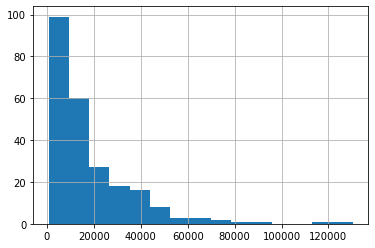

In [16]:
gdp_2014['GDP_Per_Capita'].hist(bins = 15)

The distrubition is skewed right and unimodal with one strong peak on the left side

#### 13) Find the top 5 counties and bottom 5 countries by GDP per capita in 2014

In [17]:
gdp_2014.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita
3639,"Macao SAR, China",2014,130439.106674
5003,Qatar,2014,116693.507701
3610,Luxembourg,2014,92349.186429
5316,Singapore,2014,81965.361071
707,Brunei,2014,76448.593329
...,...,...,...
3697,Malawi,2014,1142.530804
4414,Niger,2014,900.136918
1375,Dem. Rep. Congo,2014,784.872656
794,Burundi,2014,768.469837


In [18]:
gdp_2014.sort_values('GDP_Per_Capita')

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


#### 14) Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [19]:
gdp_pivoted = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2017)]

gdp_pivoted = pd.pivot_table(gdp_pivoted, index='Country', values='GDP_Per_Capita', columns = 'Year')

To remove any nulls, we'll use .dropna()

In [20]:
gdp_pivoted = gdp_pivoted.dropna()

#### 15) Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [21]:
#The year column is an int, so '2017' and '1990' won't work! The formula will work without the ''
gdp_pivoted.columns

Int64Index([1990, 2017], dtype='int64', name='Year')

In [22]:
gdp_pivoted.head()

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104


In [23]:
gdp_pivoted['Percent_Change'] = 100*(gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

In [24]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


#### 16) How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

In [25]:
neg_gdp_percent_change = gdp_pivoted[gdp_pivoted['Percent_Change'] < 0]
neg_gdp_percent_change.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Aruba to Zimbabwe
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   1990            20 non-null     float64
 1   2017            20 non-null     float64
 2   Percent_Change  20 non-null     float64
dtypes: float64(3)
memory usage: 640.0+ bytes


There are 20 countries with a negative percent change in GDP!

#### 17a) Which country had the highest % change in GDP per capita? 

In [26]:
gdp_pivoted['Percent_Change'].sort_values(ascending = False)

Country
Equatorial Guinea                              2090.973464
China                                           902.257241
Myanmar                                         668.297629
East Asia & Pacific (excluding high income)     509.437318
East Asia & Pacific (IDA & IBRD)                509.209651
                                                  ...     
Ukraine                                         -24.440266
Yemen                                           -29.812379
Burundi                                         -34.710993
United Arab Emirates                            -40.829500
Dem. Rep. Congo                                 -41.759785
Name: Percent_Change, Length: 209, dtype: float64

Equatorial Guinea has the highest % change from 1990 to 2017

#### 17b) Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. 

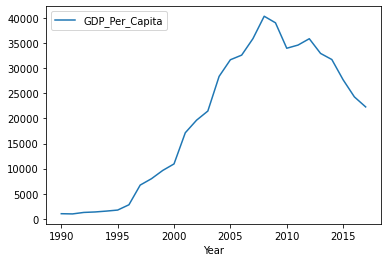

In [27]:
gdp_df[(gdp_df['Country'] == 'Equatorial Guinea') & (gdp_df['Year'].between(1990, 2017, inclusive = True))].plot(x = 'Year', y = 'GDP_Per_Capita')

#### 17c) Create another showing the country with the second highest % change in GDP.

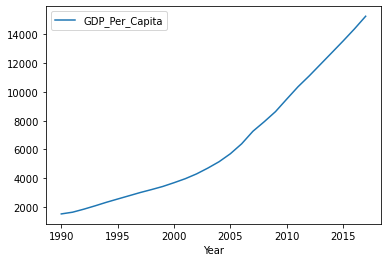

In [28]:
gdp_df[(gdp_df['Country'] == 'China') & (gdp_df['Year'].between(1990, 2017, inclusive = True))].plot(x = 'Year', y = 'GDP_Per_Capita')

 #### 17d)How do the trends in these countries compare?

Both countries saw growth throughout the '90s and mid-2000's, however, Equatorial Guinea's began to decline. China's GDP continues to grow 

#### 17 Bonus) Put both line charts on the same plot

#### 18) Read in continents.csv contained in the data folder into a new dataframe called continents. We will be using this dataframe to add a new column to our dataset.

In [29]:
continents = pd.read_csv('../data/continents.csv')

In [30]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


#### 19) Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.

In [31]:
gdp_df = gdp_df.merge(continents, on = 'Country')
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


#### 20) Determine the number of countries per continent. Create a bar chart showing this.

In [32]:
gdp_df.groupby('Continent').agg({'Country':'count'})

,Country
Continent,
Africa,1399
Asia,1226
Europe,1243
North America,739
Oceania,379
South America,348


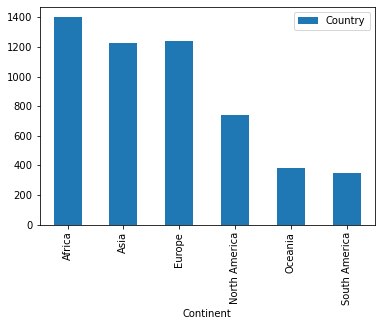

In [33]:
gdp_df.groupby('Continent').agg({'Country':'count'}).plot(kind='bar')

#### 21) Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?

In [34]:
gdp_df_2014 = gdp_df[gdp_df['Year'] == 2014]
gdp_df_2014.head()

,Country,Year,GDP_Per_Capita,Continent
4,Afghanistan,2014,1795.735834,Asia
21,Albania,2014,10700.993216,Europe
50,Algeria,2014,13557.769757,Africa
79,Angola,2014,6813.052106,Africa
108,Antigua and Barbuda,2014,20440.540555,North America


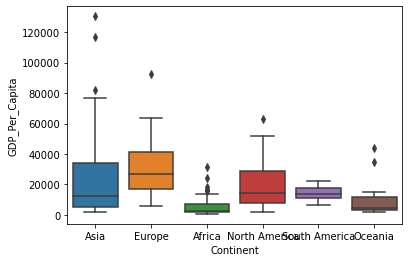

In [35]:
sns.boxplot(x = 'Continent', y = 'GDP_Per_Capita', data = gdp_df_2014);

Nearly every continent has outliers! Asia stands out as it has several countries with extremely high GDPs. Additionally, Africa has a very small interquartile range and their GDP appears to be well below the other continents

#### 22) Read in internet_use.csv into a DataFrame called internet_df. You will most likely get an error message when doing this - figure out what is going wrong and fix it. Take a look at the first and last five rows and make any corrections to your read_csv() call to fix this. Again, do not modify the original datasets.

In [36]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows=4495)

In [37]:
internet_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN


In [38]:
internet_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


#### 23) Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [39]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [40]:
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [41]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


#### 24) How many rows and columns does this new dataset have? What are the types of its columns? Ensure that the Internet_Users_Pct column is a numeric data type and fix it if it is not.

In [42]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


#### 25) What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [43]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values('Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


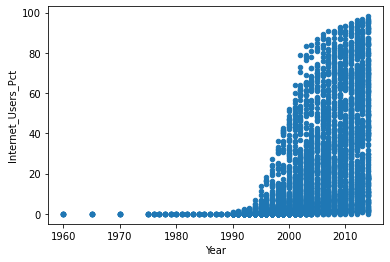

In [44]:
internet_df.plot.scatter(x = 'Year', y = 'Internet_Users_Pct');

Generally speaking, internet usage begins in the early 90's and grows rapidly from there!

#### 26) Merge gdf_df and internet_df (on Country and Year) into a single DataFrame named gdp_and_internet_use. Keep only countries and years that appear in both tables.

In [45]:
gdp_and_internet_use = gdp_df.merge(internet_df, on = ['Country', 'Year'])

#### 26) Difficult Bonus: Do not attempt this part until you have completed all other portions of the data question. Some countries have slightly different names in the internet use and gdp dataframes. For example, the Central African Republic is "Central African Republic" in the gdp dataframe and "Central African Rep." in the internet use dataframe. Find as many instances like this as you can and resolve them so that when merging you keep the maximum number of countries possible.

#### 27) Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [46]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [47]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


In [48]:
gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3519 entries, 0 to 3518
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             3519 non-null   object 
 1   Year                3519 non-null   int64  
 2   GDP_Per_Capita      3519 non-null   float64
 3   Continent           3519 non-null   object 
 4   Internet_Users_Pct  3519 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 165.0+ KB


Everything looks good!

#### 28) Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. 

In [49]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

#### What is the mean internet users percentage in 2014? 

In [50]:
gdp_and_internet_use_2014.Internet_Users_Pct.mean()

44.673536463414635

#### How many countries have at least 90% internet users in 2014?

In [51]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct'] >= 90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

There are 12 countries with at least 90% of internet users in 2014!

#### 29) Find the countries that had the top 3 largest GDP per capita figures for 2014. 

In [52]:
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending = False)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00
1685,Kuwait,2014,72588.670676,Asia,78.70
2310,Norway,2014,63328.259526,Europe,96.30
...,...,...,...,...,...
1765,Liberia,2014,1257.625441,Africa,5.41
2116,Mozambique,2014,1222.452874,Africa,5.94
1856,Malawi,2014,1142.530804,Africa,5.83
2270,Niger,2014,900.136918,Africa,1.95


The three countries with the largest GDP in 2014 were Qatar, Luxembourg, and Singapore

#### Create a seaborn FacetGrid showing the change in internet user percentage over time for these five countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?

In [60]:
## Creating a new subsetted dataframe
top_five_countries = ['Qatar', 'Luxembourg', 'Singapore', 'Kuwait', 'Norway']

top_five_gdp = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_five_countries)]

top_five_gdp.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
1685,Kuwait,2014,72588.670676,Asia,78.700000
1686,Kuwait,2013,75597.292936,Asia,75.460000
1687,Kuwait,2012,78700.458568,Asia,70.450000
1688,Kuwait,2011,78021.671676,Asia,65.769071
1689,Kuwait,2010,75359.963489,Asia,61.400000


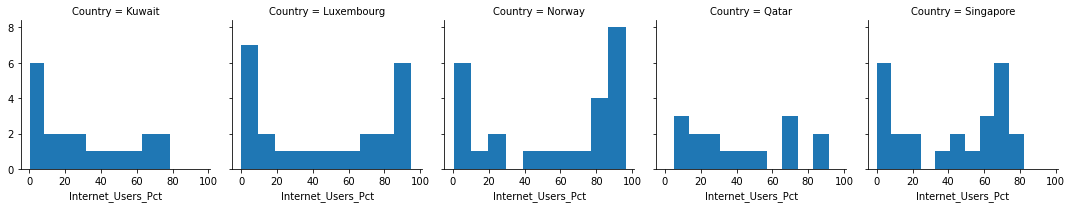

In [59]:
## FacetGrid time

graph = sns.FacetGrid(top_five_gdp, col = 'Country')
graph.map(plt.hist, 'Internet_Users_Pct');